## Analysis of Student Debt and Outcomes for Different College Types


### Data Read
- Read the 2009 and 2017 Data
- Merge the data set on school Id (UNITID)

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# Import 2017 and 2009 dataframes
raw_2017 = pd.DataFrame(pd.read_csv("Cleaned_2017_data.csv"))
raw_2009 = pd.DataFrame(pd.read_csv("Cleaned_2009_data.csv"))
merged_df = raw_2017.merge(raw_2009[["UNITID", "GRAD_DEBT_MDN", "MD_EARN_WNE_P10"]], how="left", on = "UNITID")

### Data Cleaning
- Keep only the 4 year institutions (remove all non 4 year institutes)
- Replace object "PrivacySuppressed" in data columns by NaN values
- Convert data columns to float

In [6]:
#Remove non-4 year colleges
merged_df = merged_df.loc[merged_df["ICLEVEL"] == 1]
merged_df = merged_df.reset_index(drop=True)

#Convert PrivacySuppressed tags to NaN values
for index, row in merged_df.iterrows():
    column = 0
    for cell in row:
        if cell == "PrivacySuppressed":
            merged_df.iloc[index, column] = np.nan
        column += 1

#Convert the data columns to floats
for column in merged_df.columns[8:]:
    merged_df[column] = pd.to_numeric(merged_df[column])
    
merged_df.dtypes

UNITID                int64
INSTNM               object
CITY                 object
STABBR               object
ZIP                  object
CONTROL               int64
ICLEVEL               int64
LATITUDE            float64
LONGITUDE           float64
COMPL_RPY_3YR_RT    float64
COMPL_RPY_5YR_RT    float64
COMPL_RPY_7YR_RT    float64
GRAD_DEBT_MDN_x     float64
GRAD_DEBT_MDN_y     float64
MD_EARN_WNE_P10     float64
dtype: object

### Create a new dataframe for Year 2009
- Create a dataframe to hold institute counts and median debt for each institute type
- Institute type:
    - Public
    - Private Non Profit
    - Private For Profit

In [3]:
# Remove all the rows with NaN for "Graduate Debt"
df = merged_df.dropna(axis=0, subset=["GRAD_DEBT_MDN_y"], inplace=False)
df1 = df.groupby(["CONTROL"])[["GRAD_DEBT_MDN_y"]].mean()

# Total institues in each category
df1["Count"] = df.groupby(["CONTROL"])["UNITID"].count()


# Give displayed data cleaner formatting
df1["GRAD_DEBT_MDN_y"] = df1["GRAD_DEBT_MDN_y"].map("${:,.0f}".format)

# Convert to dataframe
df1 = pd.DataFrame(df1).reset_index()
del df1["CONTROL"]

# Rename Column and Index
df1.rename(columns={"GRAD_DEBT_MDN_y":"Median Debt"},
           index={0:"Public", 1:"Priv. NonProfit", 2:"Priv. ForProfit"},
           inplace=True) 

# Name index 
df1.index.rename('Control', inplace=True)

# Change column order
df1 = df1[["Count", "Median Debt"]]

### Create a new dataframe for Year 2017
- Create a dataframe to hold institute counts and median debt for each institute type
- Institute type:
    - Public
    - Private Non Profit
    - Private For Profit

In [4]:
# Remove all the rows with NaN for "Graduate Debt"
df = merged_df.dropna(axis=0, subset=["GRAD_DEBT_MDN_x"], inplace=False)
df2 = df.groupby(["CONTROL"])[["GRAD_DEBT_MDN_x"]].mean()

# Total institues in each category
df2["Count"] = df.groupby(["CONTROL"])["UNITID"].count()


# Give displayed data cleaner formatting
df2["GRAD_DEBT_MDN_x"] = df2["GRAD_DEBT_MDN_x"].map("${:,.0f}".format)

# Convert to dataframe
df2 = pd.DataFrame(df2).reset_index()
del df2["CONTROL"]

# Rename Column and Index
df2.rename(columns={"GRAD_DEBT_MDN_x":"Median Debt"},
           index={0:"Public", 1:"Priv. NonProfit", 2:"Priv. ForProfit"},
           inplace=True) 

# Name index 
df2.index.rename('Control', inplace=True)

# Change column order
df2 = df2[["Count", "Median Debt"]]

### Merge 2009 and 2017 dataframe
- Merge 2009 and 2017 datafrmaes to create a new summary dataframe to hold median debt and retention rate
- Rename the columns to indicate 2009 and 20017 year data
- Institute type:
    - Public
    - Private Non Profit
    - Private For Profit

In [5]:
# Create combined 2009 and 2017 summary
summary_data = df1.merge(df2,left_index=True,right_index=True,how="inner")
summary_data.rename(columns={"Count_x":"Count_2009",
                             "Median Debt_x":"Median Debt_2009",
                             "Count_y":"Count_2017",
                             "Median Debt_y":"Median Debt_2017"},
                    inplace="True")

summary_data

,Count_2009,Median Debt_2009,Count_2017,Median Debt_2017
Control,,,,
Public,693,"$14,533",755,"$19,430"
Priv. NonProfit,1190,"$17,609",1335,"$23,624"
Priv. ForProfit,325,"$18,637",583,"$25,583"


In [6]:
df.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,CONTROL,ICLEVEL,LATITUDE,LONGITUDE,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,COMPL_RPY_7YR_RT,GRAD_DEBT_MDN_x,GRAD_DEBT_MDN_y,MD_EARN_WNE_P10
0,100654,Alabama A & M University,Normal,AL,35762,1,1,34.783368,-86.568502,0.429326,0.511318,0.563871,32750.0,22666.5,32600.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1,1,33.505697,-86.799345,0.618270,0.673330,0.740593,21833.0,14500.0,42800.0
2,100690,Amridge University,Montgomery,AL,36117-3553,2,1,32.362609,-86.174010,0.439024,0.550725,0.679245,22890.0,15500.0,39000.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,1,1,34.724557,-86.640449,0.680887,0.742248,0.816953,22647.0,16500.0,48300.0
4,100724,Alabama State University,Montgomery,AL,36104-0271,1,1,32.364317,-86.295677,0.366038,0.442308,0.491968,31500.0,24728.0,27600.0


In [7]:
public = df.loc[df["CONTROL"]==1]["GRAD_DEBT_MDN_x"]
nonprofit = df.loc[df["CONTROL"]==2]["GRAD_DEBT_MDN_x"]
forprofit = df.loc[df["CONTROL"]==3]["GRAD_DEBT_MDN_x"]

stats.f_oneway(public, nonprofit, forprofit)

F_onewayResult(statistic=169.27173228215077, pvalue=6.121904887792162e-70)

### Plot
1. Year 2009: Display debt distribution for different college type
2. Year 2017: Display debt distribution for different college type 

In [8]:
# Assign colors for each institution type and the names
colors = ['b', 'g', 'r']
names = ["Public", "Private Non Profit", "Private For Profit"]

In [9]:
#Define Bins
bin_width = 1000
bins = range(0, 51000, bin_width)

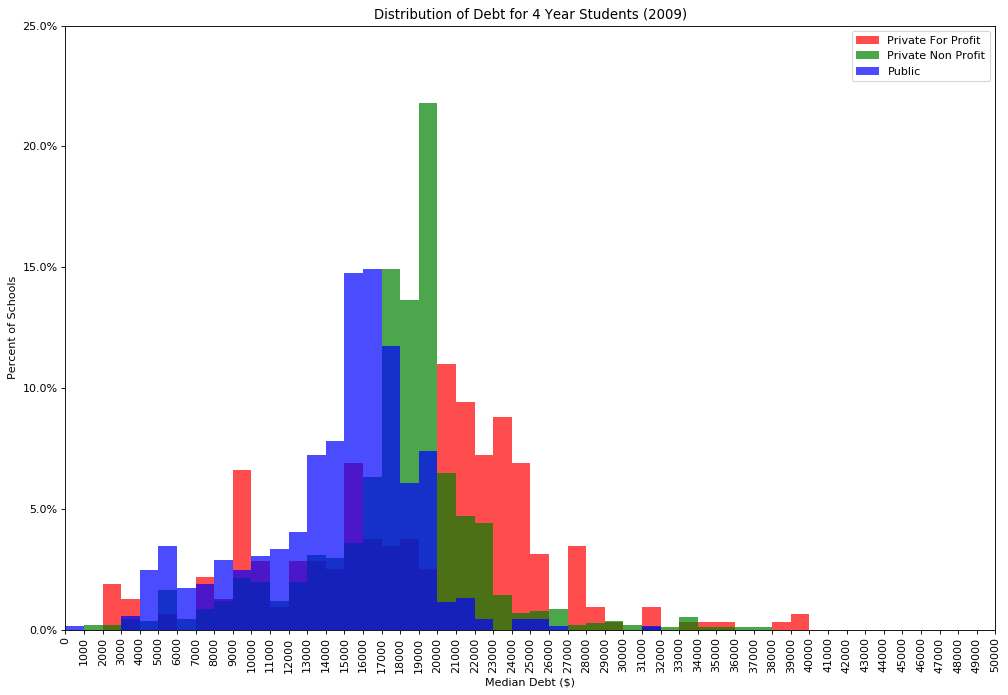

In [10]:
# Make a separate list for each institution type for 2009
x1 = list(df[df['CONTROL'] == 1]['GRAD_DEBT_MDN_y'])
x2 = list(df[df['CONTROL'] == 2]['GRAD_DEBT_MDN_y'])
x3 = list(df[df['CONTROL'] == 3]['GRAD_DEBT_MDN_y'])

# Create the plot
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([x1, x2, x3], histtype="stepfilled", bins = bins, density=True, color = colors, label=names, alpha=0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Distribution of Debt for 4 Year Students (2009)"
plt.title(graph_title)
plt.xlabel("Median Debt ($)")
plt.ylabel("Percent of Schools")

# Convert y-axis to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Plot formatting
plt.legend()
locs, labels = plt.xticks()
plt.xticks(bins, rotation="vertical")
plt.xlim(0, 50000)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

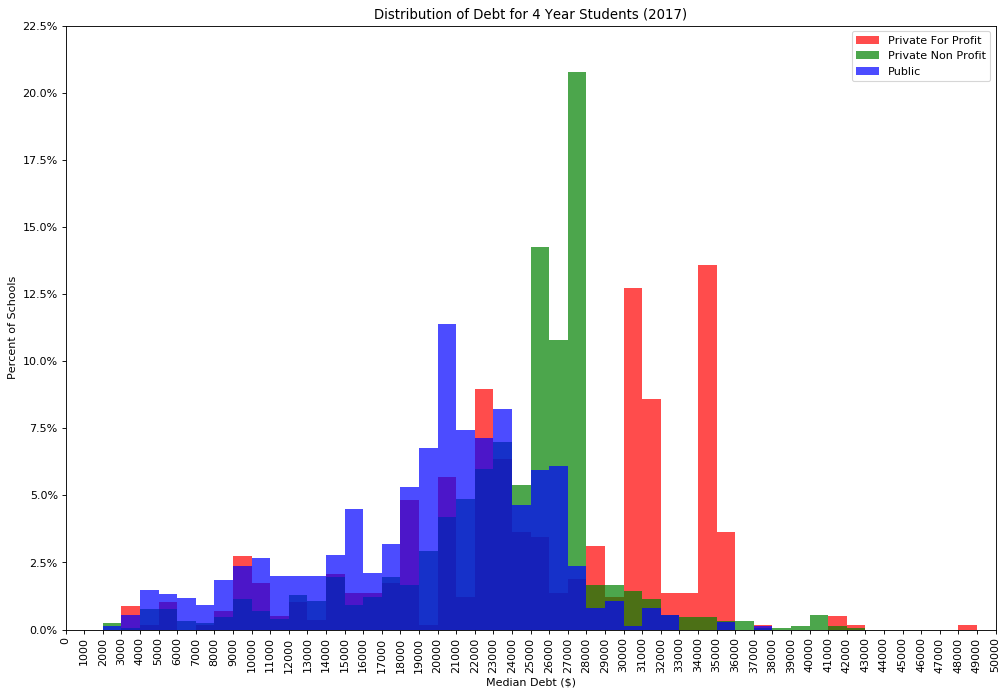

In [11]:
# Make a separate list for each institution type for 2017
y1 = list(df[df['CONTROL'] == 1]['GRAD_DEBT_MDN_x'])
y2 = list(df[df['CONTROL'] == 2]['GRAD_DEBT_MDN_x'])
y3 = list(df[df['CONTROL'] == 3]['GRAD_DEBT_MDN_x'])

# Create the plot
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.hist([y1, y2, y3], histtype="stepfilled", bins = bins, density=True, color = colors, label=names, alpha=0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Distribution of Debt for 4 Year Students (2017)"
plt.title(graph_title)
plt.xlabel("Median Debt ($)")
plt.ylabel("Percent of Schools")

# Convert y-axis to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Plot formatting
plt.legend()
locs, labels = plt.xticks()
plt.xticks(bins, rotation="vertical")
plt.xlim(0, 50000)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

### Plot Repayment Distribution
1. Plot distribution of 3-years repayment rate for each institite type
2. Plot distribution of 5-years repayment rate for each institite type
3. Plot distribution of 7-years repayment rate for each institite type

In [12]:
# Convert Repayment Rates to Percentages
merged_df['COMPL_RPY_3YR_RT_PERCENT'] = merged_df['COMPL_RPY_3YR_RT'] *100
merged_df['COMPL_RPY_5YR_RT_PERCENT'] = merged_df['COMPL_RPY_5YR_RT'] *100
merged_df['COMPL_RPY_7YR_RT_PERCENT'] = merged_df['COMPL_RPY_7YR_RT'] *100

#Define Bins
bin_width = 5
bins = np.arange(0, 105, bin_width)

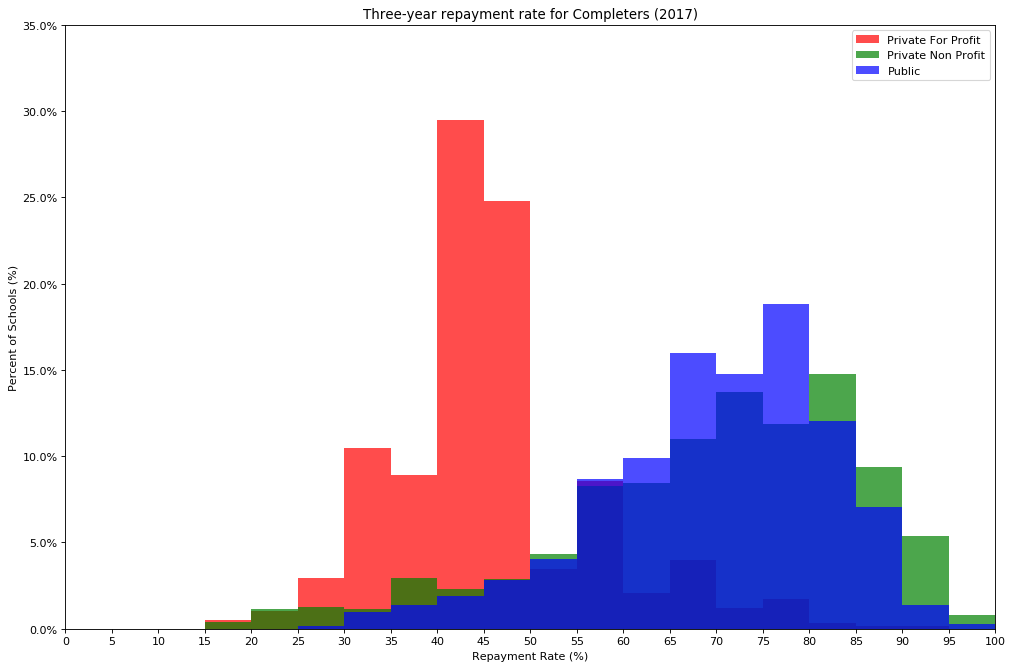

In [13]:
# Make a separate list for each institution type for 3-year repayment 
x1 = list(merged_df[merged_df['CONTROL'] == 1]['COMPL_RPY_3YR_RT_PERCENT'])
x2 = list(merged_df[merged_df['CONTROL'] == 2]['COMPL_RPY_3YR_RT_PERCENT'])
x3 = list(merged_df[merged_df['CONTROL'] == 3]['COMPL_RPY_3YR_RT_PERCENT'])

# Multiple subplos with one figure
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([x1, x2, x3], histtype="stepfilled", bins=bins, density=True, color=colors, label=names, alpha =0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Three-year repayment rate for Completers (2017)"
plt.title(graph_title)
plt.xlabel("Repayment Rate (%)")
plt.ylabel("Percent of Schools (%)")

# Plot formatting
plt.legend(loc="upper right")
plt.xlim(0, 100)
plt.xticks(bins)

# Convert y-axis from normalized units to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

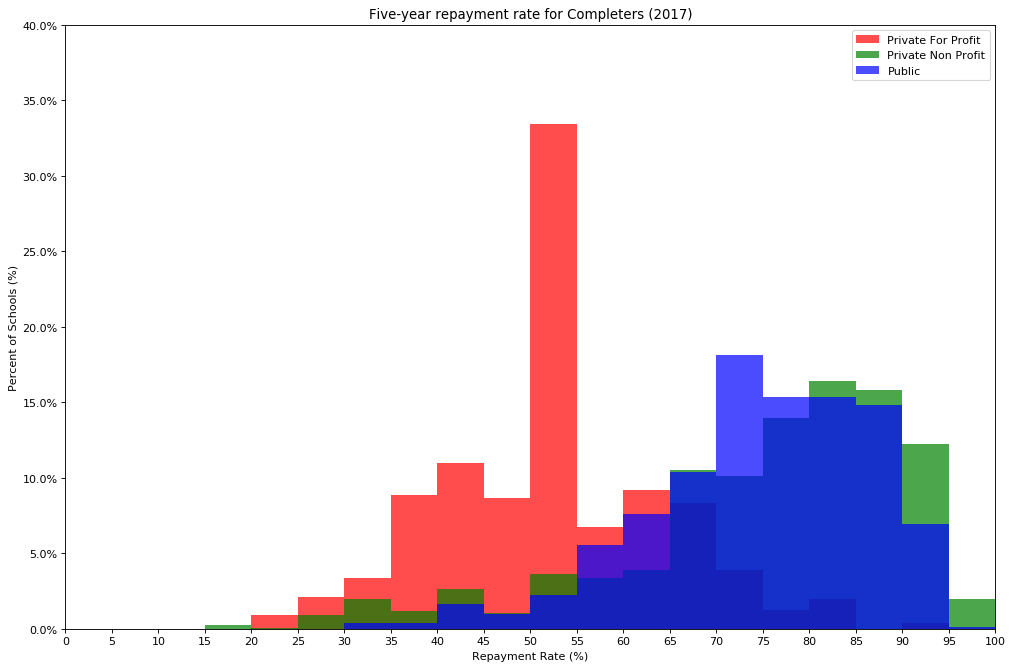

In [14]:
# Make a separate list for each institution type for 5-year repayment
y1 = list(merged_df[merged_df['CONTROL'] == 1]['COMPL_RPY_5YR_RT_PERCENT'])
y2 = list(merged_df[merged_df['CONTROL'] == 2]['COMPL_RPY_5YR_RT_PERCENT'])
y3 = list(merged_df[merged_df['CONTROL'] == 3]['COMPL_RPY_5YR_RT_PERCENT'])

# Multiple subplos with one figure
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([y1, y2, y3], histtype="stepfilled", bins = bins, density=True, color = colors, label=names, alpha =0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Five-year repayment rate for Completers (2017)"
plt.title(graph_title)
plt.xlabel("Repayment Rate (%)")
plt.ylabel("Percent of Schools (%)")

# Plot formatting
plt.legend(loc="upper right")
plt.xlim(0, 100)
plt.xticks(bins)

# Convert y-axis from normalized units to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

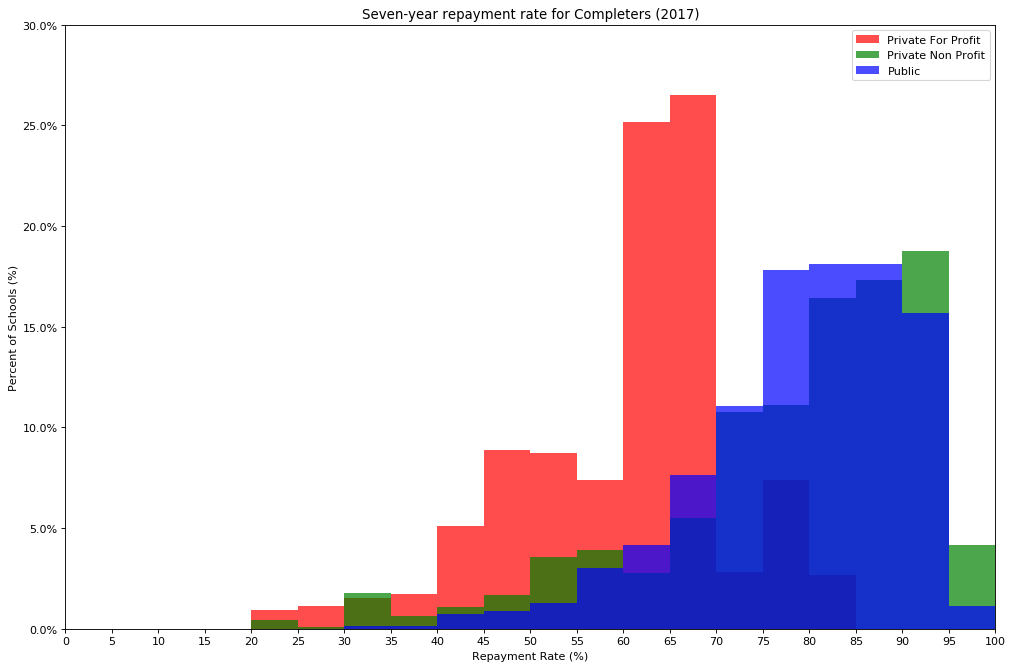

In [15]:
# Make a separate list for each institution type for 7-year repayment
z1 = list(merged_df[merged_df['CONTROL'] == 1]['COMPL_RPY_7YR_RT_PERCENT'])
z2 = list(merged_df[merged_df['CONTROL'] == 2]['COMPL_RPY_7YR_RT_PERCENT'])
z3 = list(merged_df[merged_df['CONTROL'] == 3]['COMPL_RPY_7YR_RT_PERCENT'])

# Multiple subplos with one figure
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([z1, z2, z3], histtype="stepfilled", bins = bins, density=True, color = colors, label=names, alpha =0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Seven-year repayment rate for Completers (2017)"
plt.title(graph_title)
plt.xlabel("Repayment Rate (%)")
plt.ylabel("Percent of Schools (%)")

# Plot formatting
plt.legend(loc="upper right")
plt.xlim(0, 100)
plt.xticks(bins)

# Convert y-axis from normalized units to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

### Plot Debt on Graduation against Future Earnings
1. Take a sample of the cleaned data
2. Create a scatter plot of median graduate debt against median earnings 10 years after graduation

In [16]:
#Create a smaller sample to test with
test_df = merged_df[["GRAD_DEBT_MDN_y", "MD_EARN_WNE_P10", "CONTROL"]]
test_df = pd.DataFrame(test_df.dropna())
test_df = test_df.sample(n=1000)
test_df = test_df.reset_index()

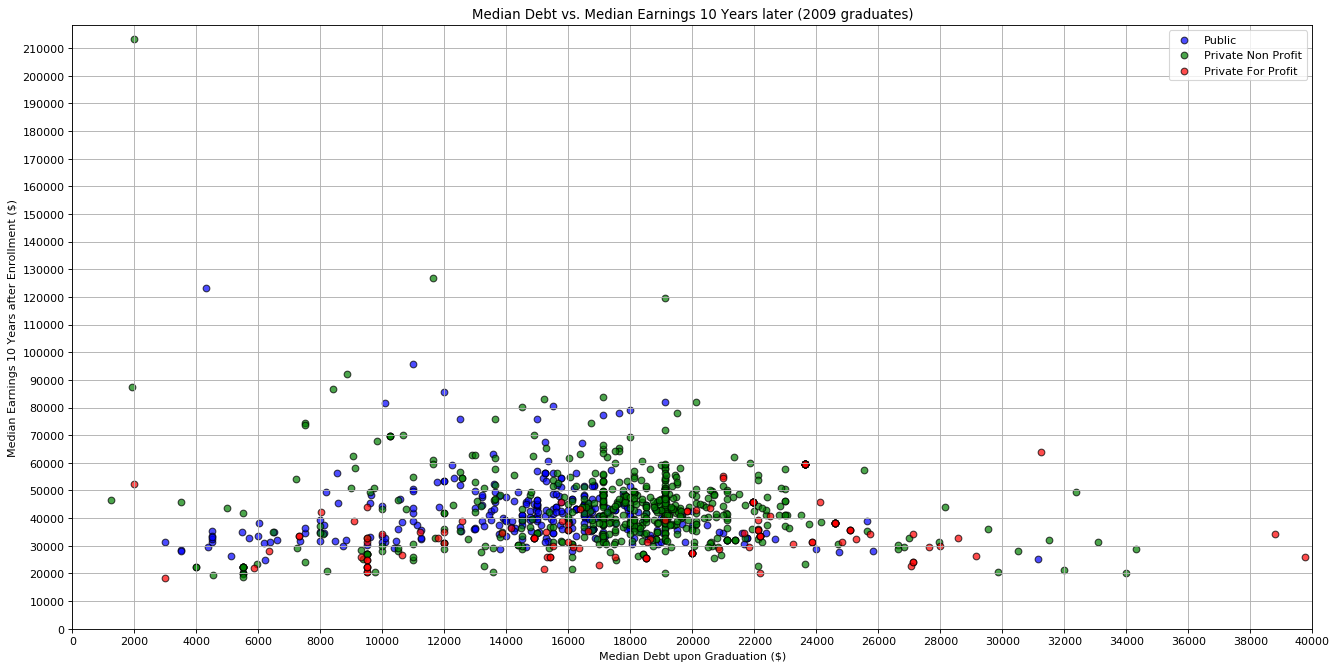

In [17]:
public_df = test_df.loc[test_df["CONTROL"]==1]
nonprofit_df = test_df.loc[test_df["CONTROL"]==2]
forprofit_df = test_df.loc[test_df["CONTROL"]==3]

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(public_df["GRAD_DEBT_MDN_y"], public_df["MD_EARN_WNE_P10"], 
           label=names[0], color=colors[0], edgecolors="k", alpha=0.7)
plt.scatter(nonprofit_df["GRAD_DEBT_MDN_y"], nonprofit_df["MD_EARN_WNE_P10"],
           label=names[1], color=colors[1], edgecolors="k", alpha=0.7)
plt.scatter(forprofit_df["GRAD_DEBT_MDN_y"], forprofit_df["MD_EARN_WNE_P10"],
           label=names[2], color=colors[2], edgecolors="k", alpha=0.7)

# Setup axis labels and ticks
plt.xticks(np.arange(0, max(test_df["GRAD_DEBT_MDN_y"]) + 500, 2000))
plt.yticks(np.arange(0, max(test_df["MD_EARN_WNE_P10"]) + 5000, 10000))
plt.ylabel("Median Earnings 10 Years after Enrollment ($)")
plt.xlabel("Median Debt upon Graduation ($)")
plt.ylim(0, max(test_df["MD_EARN_WNE_P10"]) + 5000)
plt.xlim(0, 40000)
graph_title = "Median Debt vs. Median Earnings 10 Years later (2009 graduates)"
plt.title(graph_title)
plt.grid()
plt.legend()

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

## Check debt variation by state

So far we have mainly been focused on public schools as an aggregate but their cost may vary by the state government responsible for them. Thus we have prepared plots on student debt divided by their respective state/US territory.
1. Box Plot of Median Debt at Public Schools, grouped by State
2. Box Plot of Median Debt at Private Schools, grouped by State

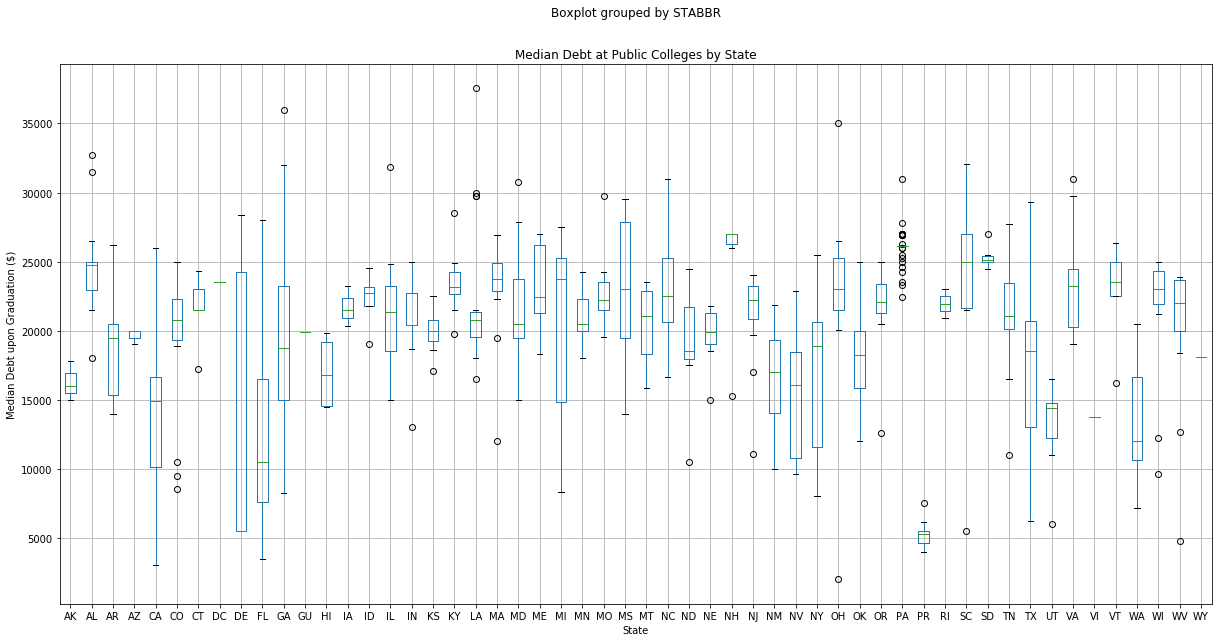

In [35]:
# Build a DataFrame of Median Debt, State and Control
state_df = merged_df[["GRAD_DEBT_MDN_x", "STABBR", "CONTROL"]]
state_df = pd.DataFrame(state_df.dropna())
public_df = state_df.loc[state_df["CONTROL"]==1]
private_df = state_df.loc[state_df["CONTROL"]>1]

# Plot data and label axis
fig1 = public_df.boxplot("GRAD_DEBT_MDN_x", by="STABBR", figsize=(20, 10))
fig1.set_xlabel("State")
fig1.set_ylabel("Median Debt upon Graduation ($)")
graph_title = "Median Debt at Public Colleges by State"
fig1.set_title(graph_title)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

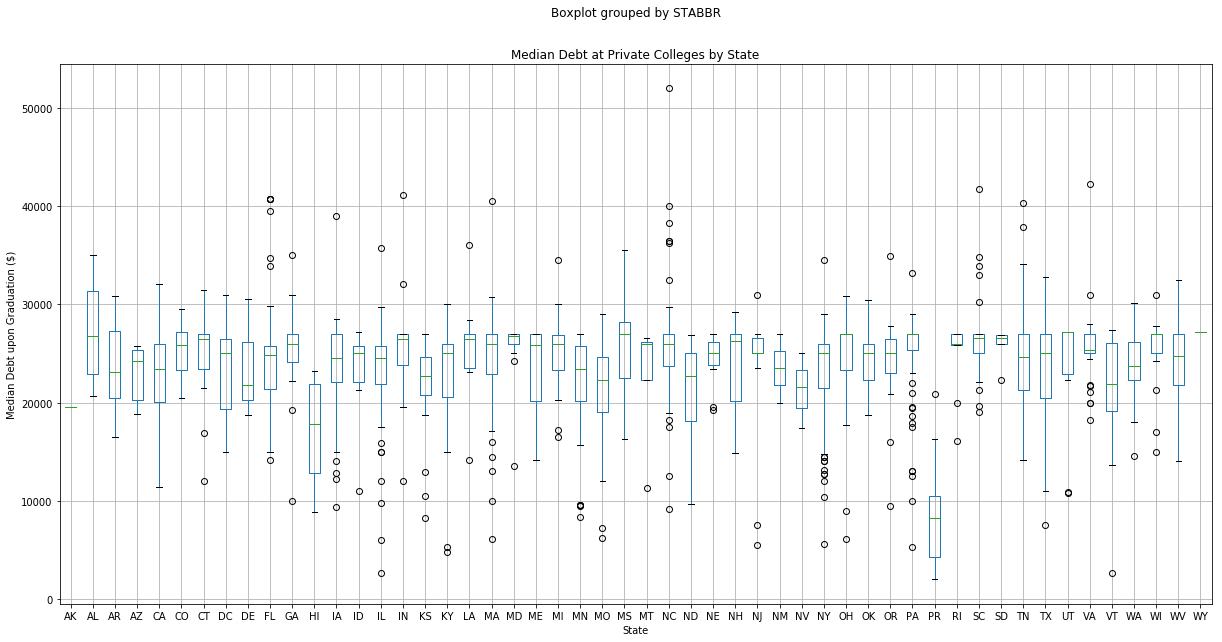

In [36]:
fig2 = nonprofit_df.boxplot("GRAD_DEBT_MDN_x", by="STABBR", figsize=(20, 10))
fig2.set_xlabel("State")
fig2.set_ylabel("Median Debt upon Graduation ($)")
graph_title = "Median Debt at Private Colleges by State"
fig2.set_title(graph_title)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

## School Ranking

1. Produce a quick and crude ranking of schools by comparing their median debt and median earnings
2. Create an interactive gmap showing the top 10 schools
3. Display them in a table

In [32]:
best_schools_df = merged_df[['INSTNM', "CITY", "LATITUDE", "LONGITUDE", "GRAD_DEBT_MDN_y", "MD_EARN_WNE_P10", "CONTROL"]]
best_schools_df["Earnings/Debt Ratio"] = best_schools_df["MD_EARN_WNE_P10"]/best_schools_df["GRAD_DEBT_MDN_y"]
best_schools_df = best_schools_df.dropna()
best_schools_df = best_schools_df.sort_values("Earnings/Debt Ratio", ascending=False).head(10)

C:\Users\alexa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,INSTNM,CITY,LATITUDE,LONGITUDE,GRAD_DEBT_MDN_y,MD_EARN_WNE_P10,CONTROL,Earnings/Debt Ratio
1741,Philadelphia College of Osteopathic Medicine,Philadelphia,40.004885,-75.216092,2000.0,213400.0,2,106.700000
1711,Salus University,Elkins Park,40.085774,-75.129511,1920.0,87500.0,2,45.572917
1635,University of Western States,Portland,45.543253,-122.525979,1231.0,46500.0,2,37.774167
136,Western University of Health Sciences,Pomona,34.058092,-117.747732,4500.0,132600.0,2,29.466667
95,University of California-Hastings College of Law,San Francisco,37.781137,-122.415700,4300.0,123100.0,1,28.627907
99,Alliant International University-San Diego,San Diego,32.897056,-117.094398,2000.0,52400.0,3,26.200000
996,Northwestern Health Sciences University,Bloomington,44.850963,-93.311222,2000.0,42800.0,2,21.400000
1815,Medical University of South Carolina,Charleston,32.784363,-79.947158,5500.0,76100.0,1,13.836364
1059,Logan University,Chesterfield,38.631330,-90.542333,3500.0,45900.0,2,13.114286
853,Harvard University,Cambridge,42.374471,-71.118313,6000.0,76800.0,2,12.800000


In [33]:
# Create a gmap with the top 10 schools by Earnings to Debt Ratio

# Configure gmaps
import gmaps
import gmaps.datasets
from config import gkey
import pandas as pd
gmaps.configure(api_key=gkey)


# 
locations = best_schools_df[["LATITUDE", "LONGITUDE"]]
school_labels = best_schools_df["INSTNM"].tolist()

# Plot Heatmap
fig = gmaps.figure(mouse_handling="COOPERATIVE")

# Create a marker layer
marker_layer = gmaps.marker_layer(
        locations,
        hover_text=school_labels
    )
# Add layer
fig.add_layer(markers)
#fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Display our ranking of schools with the best debt outcomes

ranking = best_schools_df.reset_index(drop=True)[["INSTNM", "CITY", "GRAD_DEBT_MDN_y", "MD_EARN_WNE_P10", "CONTROL"]]
ranking["GRAD_DEBT_MDN_y"] = ranking["GRAD_DEBT_MDN_y"].map("${:,.0f}".format)
ranking["MD_EARN_WNE_P10"] = ranking["MD_EARN_WNE_P10"].map("${:,.0f}".format)
ranking = ranking.rename(columns = {"INSTNM": "Name",
                         "GRAD_DEBT_MDN_y": "Median Debt (2009)",
                         "MD_EARN_WNE_P10": "Median Earnings after 10 Years",
                        "CONTROL": "School Type"})
for index, row in ranking.iterrows():
    if ranking.iloc[index, 4] == 1:
        ranking.iloc[index, 4] = "Public"
    if ranking.iloc[index, 4] == 2:
        ranking.iloc[index, 4] = "Non-Profit"
    if ranking.iloc[index, 4] == 3:
        ranking.iloc[index, 4] = "For-Profit"
ranking

,Name,CITY,Median Debt (2009),Median Earnings after 10 Years,School Type
0,Philadelphia College of Osteopathic Medicine,Philadelphia,"$2,000","$213,400",Non-Profit
1,Salus University,Elkins Park,"$1,920","$87,500",Non-Profit
2,University of Western States,Portland,"$1,231","$46,500",Non-Profit
3,Western University of Health Sciences,Pomona,"$4,500","$132,600",Non-Profit
4,University of California-Hastings College of Law,San Francisco,"$4,300","$123,100",Public
5,Alliant International University-San Diego,San Diego,"$2,000","$52,400",For-Profit
6,Northwestern Health Sciences University,Bloomington,"$2,000","$42,800",Non-Profit
7,Medical University of South Carolina,Charleston,"$5,500","$76,100",Public
8,Logan University,Chesterfield,"$3,500","$45,900",Non-Profit
9,Harvard University,Cambridge,"$6,000","$76,800",Non-Profit
